# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(500., 490.)
        return [new_thrust + random.gauss(0., 0.01) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.

file_output = 'data.txt'                         # file name for saved results
init_pose = np.array([0., 0., 100., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
runtime = 30.                                    # time limit of the episode
target_pos = np.array([0., 0., 100.])

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

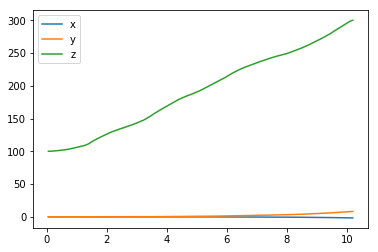

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

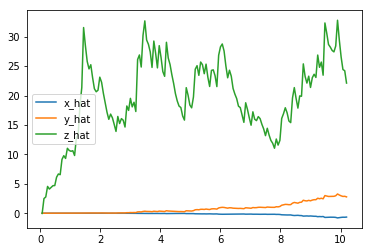

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

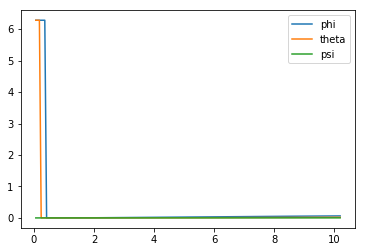

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

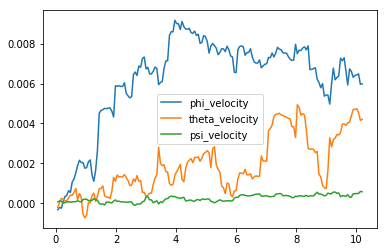

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

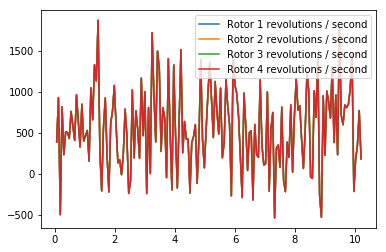

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -1.70777452e+00   8.19068733e+00   3.00000000e+02   6.31951995e-02
   1.93023423e-02   2.44477444e-03]
[ -0.66013304   2.77385234  22.11596687]
[ 0.00598476  0.00420844  0.00057688]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import numpy as np
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 100
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  100, score =  -0.374 (best =  -0.121), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [70]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline
import time
import matplotlib.pyplot as plt
import csv
import sys
import numpy as np
from agents.agent import DDPG
from task import Hover


# Modify the values below to give the quadcopter a different starting position.


init_pose = np.array([-5., 5., 100., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
runtime = 30.                                    # time limit of the episode
target_pos = np.array([0., 0., 150.])

# Setup

task = Hover(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = DDPG(task) 
done = False

file_output = 'data.txt'                         # file name for saved results
labels = ['episode','step','time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4','score','reward']
results = {x : [] for x in labels}
num_episodes = 1000
ckpt = 10
# Run the simulation, and save the results.
for i in range(1, num_episodes+1):
    with open(file_output, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(labels)
        state = agent.reset_episode()
        while True:
            rotor_speeds = agent.act(state)
            next_state, reward, done = task.step(rotor_speeds)
            agent.step(rotor_speeds, reward, next_state, done)
            state = next_state
            to_write =[i] + [agent.num_steps] +[task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)+ [agent.score] + [reward] 
            for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
                    writer.writerow(to_write)
#             if i % ckpt == 0:
#                 to_write =[i] + [task.sim.time] +[agent.num_steps] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)+ [agent.score] + [reward] + [agent.critic_loss]+ agent.actor_loss
#                 for ii in range(len(labels)):
#                         results[labels[ii]].append(to_write[ii])
#                         writer.writerow(to_write)
            if done:
                
                print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise scale = {:7.3f}, time={:7.3}, steps:{}".format(i, agent.score, agent.best_score, agent.noise.scale, agent.task.sim.time, agent.task.num_steps), end="")  # [debug]
                break
            

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode = 1000, score = -161.551 (best = 599.187), noise scale =  -0.691, time=   3.48, steps:5856

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

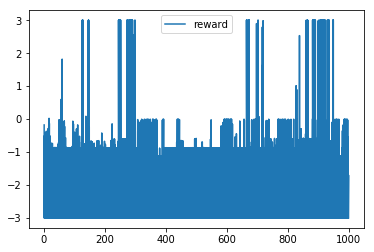

In [77]:
plt.plot(results['episode'], results['reward'], label='reward')

plt.legend()
_ = plt.ylim()

The rewards from each episode does not provious much information. I am going to plot the mean of reward for reference.

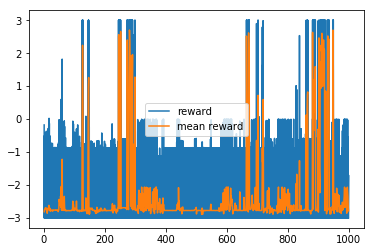

In [120]:
means={} 

for i in range(1,1001):
    means[i]=[]  

for item in range(len(results['episode'])):
    if results['episode'][item] in means.keys():
        means[results['episode'][item]].append(results['reward'][item])
ks = []
vs = []
for k, v in means.items():
    vm = np.mean(v)
    ks.append(float(k))
    vs.append(float(vm))
    
        
#     else:
#         means[i].append(results['reward'])
plt.plot(results['episode'], results['reward'], label='reward')
plt.plot(ks,vs, label='mean reward')


plt.legend()
_ = plt.ylim()

The graph shows that on the later episode the agent tends to have higher mean of rewards. Nevertheless, the agent is not learning as efficient as expected. The trend of rewards does not show obvious increase.

While developing the agent, I tried changing the number of layers and number of node other than adding batch normalization and dropout. Nevertheless, when adding too many layers the speed sacrificed didn't earn the performance I expected. Therefore, my agent stays with current architecture. Activation functions sigmoid and tanh were tested in the model, but relu gives a rather reliable result. I control hyperparameter and change only one at a time: learning rate, discount rate, and tau for soft update proportion. The results did not lead to major improvement. I tried adjusting the parameter for noise to increase exploration, however, I ended up keep it a bit lower to make the agent controls its actions better. Most of the attempts did not return better result, but if any attempt made the mean of reward went up, I would say clipping the gradient and reward are the factor that returns better result.


Episode 990 has mean reward of -2.5687372797173813
Episode 991 has mean reward of -2.4596367627606543
Episode 992 has mean reward of -2.618816065861275
Episode 993 has mean reward of -2.129713704843986
Episode 994 has mean reward of -2.856546764233677
Episode 995 has mean reward of -2.6807206032420456
Episode 996 has mean reward of -2.0671346909338117
Episode 997 has mean reward of -2.2090893292516793
Episode 998 has mean reward of -2.3307588383683635
Episode 999 has mean reward of -2.6676571251266945
Episode 1000 has mean reward of -2.7853600962651184


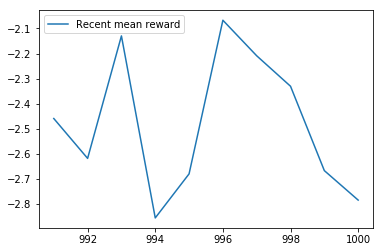

In [131]:
plt.plot(ks[-10:],vs[-10:], label='Recent mean reward')


plt.legend()
_ = plt.ylim()
for i in range(990,1001):
    print('Episode {} has mean reward of {}'.format(i, vs[i-1]))
    

The most recent 10 episodes have similar mean of rewards.

In [121]:
import time
import matplotlib.pyplot as plt
import csv
state = agent.reset_episode()
done = False

file_output = 'data2.txt'
labels = ['episode','step','time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4','score','reward','critic_loss','actor_loss']
results = {x : [] for x in labels}
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset_episode()
    while True:
        rotor_speeds = agent.act(state)
        next_state, reward, done = task.step(rotor_speeds)
        agent.step(rotor_speeds, reward, next_state, done)
        state = next_state
        to_write =[0] + [agent.num_steps] +[task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)+ [agent.score] + [reward] + [agent.critic_loss]+ agent.actor_loss
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
#             print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise scale = {:7.3f}, time={:7.3}, steps:{}".format(i, agent.score, agent.best_score, agent.noise.scale, agent.task.sim.time, agent.task.num_steps), end="")  # [debug]

        if done:
            break

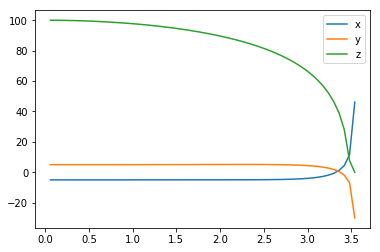

In [122]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')


plt.legend()
_ = plt.ylim()

As a single episode got plotted out, it looks like the agent will try to hold against falling, but then quickly crush to the ground.

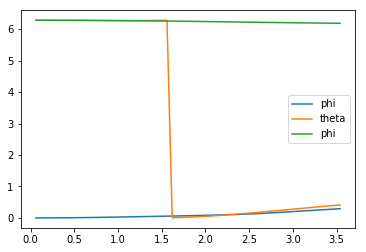

In [123]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='phi')

plt.legend()
_ = plt.ylim()

From the graph of angular change it looks like the quadcopter is quite stable, slight tilted towards the end.

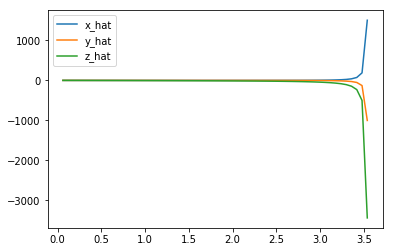

In [124]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

From the velocity it is obvious that the quadcopter was hanging in the air before speeding towards the ground.

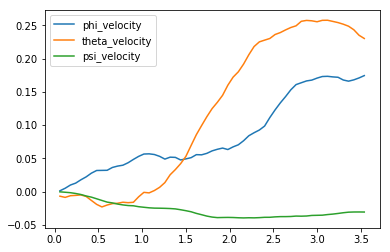

In [125]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Looks like the quadcopter was trying to make itself balance. The angular velocity for previous version often went crazy and turned the quadcopter into a spinner.

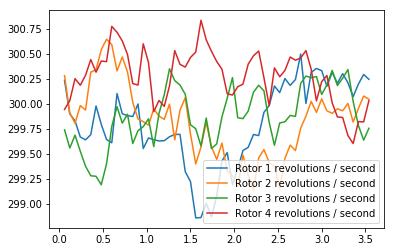

In [126]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

From the rotor speed it looks like 4 rotors were converging to smaller range, but the agent crushed before it reaches a balance.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:The task I specified is to hover in the air. The definition is staying at the designated height for a period of time. Horizontal location does not need to be as precise as vertical location. The quadcopter should be in a stable state near target height as long as possible.

My reward function depends on the vertical distance to the target, degree of tilting.

I started with height as it is the most important factor in my definition, setting reward when the agent is at the right height. After a few run, I observed the agent does not know to stablize itself, and I added a punishment for tilting. 

My reward funciton ended up starting with default value 10., and minus discounted vertical distance. Given the inital location and target location apart 50 units, I discounted the distanct to make the inital state to have 0 reward. As I figured that tilting makes the drone crushes quickly, I added a punishment for tilting. Finally, as long as the agent stays close enough to target, I give the agent bonus no matter how.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I am using DDPG model because this is a continuous state space task. I also tried deep Q network, but can hardly deal with the numerous state combinations. I tried reducing the state size, which does not help a lot. Turns out DDPG is the most effective method to deal with continous state space.

I assigned actor model 0.0001 as learning rate and critic model 0.001 as learning rate, 0.99 as discount factor for Q value, and 0.01 for soft update parameter. They mainly came from trial and error and collective knowledge, but my ratinoale is that critic model is the part that stores and evaluate Q value, therefore higher learning rate helps the effeciency. As a continous state task, the q value for the following state should be taken into consideration more heavily. As for soft update, target model is the main model we want to compile learning results and we give it higher porportion than local model's weights.

I used fully connected four hidden layers for each model (actor, critic_state, critic_action). Each start with 128 , 256, and 256 neurons. The activation function is relu except the last layer of actor using sigmoid. I select l2 regulator for my network, applied batch normalization and drop out function to each layer to avoid over-fitting. Initialier for weights were glorot_normal, which is the function for xavier initialization in keras.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: Not an easy task for me and my drone. It seems easy at the first glance, but it turns out the agent may read it in a very different way depends on reward function. The agent learns the task gradually, which may not be very obvious by looking at a single episode. 

The final 10 episodes gotthe similar mean of rewards, which falls around-2.3... I would not say it is a good result but I think it is learning somethin

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: I feel the troubleshooting part is still bugging me. My drone is still not hovering as I expected. After checking slack and forum I am officially stuck... 

I tried different architect of nn but figure it might not be helpful without making sure I am on the right track. I than started with basic model and added few things that are generally helping the agent learn - batch normalization and dropout. After that is a long process of debugging. I played with hyperparameters and try to only change one hyperparameter at at time. The following is some observations:

1 ) Changing parameter for OUNoise function: reducing noise helps stablized the rotor speed, but not really helping performance in the long run
2 ) Changing replaybuffer parameters : changing memory size helped my agent to hit higher reward at earlier stage, but does not seem to improve better
3 ) Lowering tau seems to make the agent not learning or learn slower.
4 ) Changing the learning rate for actor and critic seems to be helping, but after a few runs I couldn't identify the right direction to change.
5 ) I thought about combining RNN to the model, but it took very long to train and I am not seeing obvious change.

I feel my current setting should at lease shows some signs of learning, but I am not confident with the result. I am eager to learn how I can correct my model.